In [1]:
import pandas as pd
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import cufflinks as cf
import plotly as py
py.offline.init_notebook_mode(connected = True)
plt.rcParams.update({'font.size': 32})
cf.go_offline()
sns.set()

In [2]:
V_20_5_percent = pd.read_csv('20/Vin_is_20V_and_5_%_20-08-10_0948.lvm', sep='\t')
V_20_10_percent = pd.read_csv('20/Vin_is_20V_and_10_%_20-08-10_0957.lvm', sep='\t')
V_20_20_percent = pd.read_csv('20/Vin_is_20V_and_20_%_20-08-10_1005.lvm', sep='\t')
V_20_30_percent = pd.read_csv('20/Vin_is_20V_and_30_%_20-08-10_1009.lvm', sep='\t')
V_20_50_percent = pd.read_csv('20/Vin_is_20V_and_50_%_20-08-10_1013.lvm', sep='\t')
V_20_30_percent.head(130)

,X_Value,Imp_Actual,Vmp_Actual,Isc_Actual,Voc_Actual,Vpv_Measured,Ipv_Measured,Ppv_Measured,Vac_rms,Iac_rms,Pac_real,Sac,PF,Comment
0,16.235071,3.513638,20.74822,3.870968,25.64103,44.948,0.030983,1.3750,230.51,0.049874,-0.21063,11.496,-0.018322,NaN
1,16.500020,3.513638,20.74822,3.870968,25.64103,44.948,0.030983,1.3750,230.48,0.049850,-0.21057,11.489,-0.018327,NaN
2,17.000027,3.513638,20.74822,3.870968,25.64103,31.787,0.350590,-9.0675,230.44,0.049811,-0.21094,11.479,-0.018377,NaN
3,17.500010,3.513638,20.74822,3.870968,25.64103,25.574,0.047964,1.2217,230.42,0.049765,-0.20984,11.467,-0.018300,NaN
4,17.999961,3.513638,20.74822,3.870968,25.64103,25.561,0.059470,1.5165,230.41,0.050185,-0.21559,11.563,-0.018645,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,78.497358,3.513638,20.74822,3.870968,25.64103,20.646,3.496000,72.0780,229.43,0.291900,65.28100,66.972,0.974750,NaN
126,78.998311,3.513638,20.74822,3.870968,25.64103,20.677,3.490700,72.0770,229.44,0.291910,65.28300,66.975,0.974730,NaN
127,79.497271,3.513638,20.74822,3.870968,25.64103,20.707,3.485500,72.0740,229.44,0.291910,65.28500,66.976,0.974760,NaN
128,79.997222,3.513638,20.74822,3.870968,25.64103,20.699,3.486700,72.0710,229.45,0.291960,65.29100,66.989,0.974650,NaN


## 20 V 

In [3]:
Efficiency_5_percent = pd.DataFrame(V_20_5_percent['Pac_real']/V_20_5_percent['Ppv_Measured'])
Efficiency_5_percent.mean()

0    0.732214
dtype: float64

In [4]:
Efficiency_10_percent = pd.DataFrame(V_20_10_percent['Pac_real']/V_20_10_percent['Ppv_Measured'])
Efficiency_10_percent = Efficiency_10_percent[Efficiency_10_percent > 0].dropna()
Efficiency_10_percent.mean()

0    0.808307
dtype: float64

In [5]:
Efficiency_20_percent = pd.DataFrame(V_20_20_percent['Pac_real']/V_20_20_percent['Ppv_Measured'])
Efficiency_20_percent = Efficiency_20_percent[Efficiency_20_percent > 0].dropna()
Efficiency_20_percent.mean()


0    0.871777
dtype: float64

In [6]:
Efficiency_30_percent = pd.DataFrame(V_20_30_percent['Pac_real']/V_20_30_percent['Ppv_Measured'])
Efficiency_30_percent = Efficiency_30_percent[Efficiency_30_percent > 0].dropna()
Efficiency_30_percent.mean()

0    0.897759
dtype: float64

In [7]:
Efficiency_50_percent = pd.DataFrame(V_20_50_percent['Pac_real']/V_20_50_percent['Ppv_Measured'])
Efficiency_50_percent = Efficiency_50_percent[Efficiency_50_percent > 0].dropna()
Efficiency_50_percent.mean()

0    0.9196
dtype: float64

In [8]:
MPPT_20V_5_percent = V_20_5_percent['Ppv_Measured']/(V_20_5_percent['Vmp_Actual']*V_20_5_percent['Imp_Actual'])
MPPT_20V_5_percent = MPPT_20V_5_percent[MPPT_20V_5_percent < 1].dropna()
MPPT_20V_5_percent.mean()

0.9856599315119222

In [9]:
MPPT_20V_10_percent = V_20_10_percent['Ppv_Measured']/(V_20_10_percent['Vmp_Actual']*V_20_10_percent['Imp_Actual'])
MPPT_20V_10_percent = MPPT_20V_10_percent[MPPT_20V_10_percent < 1].dropna()
MPPT_20V_10_percent = MPPT_20V_10_percent[MPPT_20V_10_percent > 0.2].dropna()
MPPT_20V_10_percent.mean()

0.9932768555979862

In [10]:
MPPT_20V_20_percent = V_20_20_percent['Ppv_Measured']/(V_20_20_percent['Vmp_Actual']*V_20_20_percent['Imp_Actual'])
MPPT_20V_20_percent = MPPT_20V_20_percent[MPPT_20V_20_percent < 1].dropna()
MPPT_20V_20_percent = MPPT_20V_20_percent[MPPT_20V_20_percent > 0.2].dropna()
MPPT_20V_20_percent.mean()

0.987784700441142

In [11]:
MPPT_20V_30_percent = V_20_30_percent['Ppv_Measured']/(V_20_30_percent['Vmp_Actual']*V_20_30_percent['Imp_Actual'])
MPPT_20V_30_percent = MPPT_20V_30_percent[MPPT_20V_30_percent < 1].dropna()
MPPT_20V_30_percent = MPPT_20V_30_percent[MPPT_20V_30_percent > 0.2].dropna()
MPPT_20V_30_percent.mean()

0.9829340166848891

In [12]:
MPPT_20V_50_percent = V_20_50_percent['Ppv_Measured']/(V_20_50_percent['Vmp_Actual']*V_20_50_percent['Imp_Actual'])
MPPT_20V_50_percent = MPPT_20V_50_percent[MPPT_20V_50_percent < 1].dropna()
MPPT_20V_50_percent = MPPT_20V_50_percent[MPPT_20V_50_percent > 0.2].dropna()
MPPT_20V_50_percent.mean()

0.9704749879431095

## 35 V

In [13]:
V_35_5_percent = pd.read_csv('35/Vin_is_35.1V_and_5_%_20-08-10_1136.lvm', sep='\t')
V_35_10_percent = pd.read_csv('35/Vin_is_35.1V_and_10_%_20-08-10_1140.lvm', sep='\t')
V_35_20_percent = pd.read_csv('35/Vin_is_35.1V_and__20%_20-08-10_1144.lvm', sep='\t')
V_35_30_percent = pd.read_csv('35/Vin_is_35.1V_and__30%_20-08-10_1148.lvm', sep='\t')
V_35_50_percent = pd.read_csv('35/Vin_is_35.1V_and__50%_20-08-10_1152.lvm', sep='\t')
V_35_75_percent = pd.read_csv('35/Vin_is_35.1V_and__75%_20-08-10_1156.lvm', sep='\t')
V_35_100_percent = pd.read_csv('35/Vin_is_35.1V_and__100%_20-08-10_1201.lvm', sep='\t')


In [14]:
Efficiency_35V_5_percent = pd.DataFrame(V_35_5_percent['Pac_real']/V_35_5_percent['Ppv_Measured'])
Efficiency_35V_5_percent = Efficiency_35V_5_percent[Efficiency_35V_5_percent > 0].dropna()
Efficiency_35V_5_percent.mean()

0    0.482201
dtype: float64

In [15]:
Efficiency_35V_10_percent = pd.DataFrame(V_35_10_percent['Pac_real']/V_35_10_percent['Ppv_Measured'])
Efficiency_35V_10_percent = Efficiency_35V_10_percent[Efficiency_35V_10_percent > 0].dropna()
Efficiency_35V_10_percent.mean()

0    0.71923
dtype: float64

In [16]:
Efficiency_35V_20_percent = pd.DataFrame(V_35_20_percent['Pac_real']/V_35_20_percent['Ppv_Measured'])
Efficiency_35V_20_percent = Efficiency_35V_20_percent[Efficiency_35V_20_percent > 0].dropna()
Efficiency_35V_20_percent.mean()

0    0.836353
dtype: float64

In [17]:
Efficiency_35V_30_percent = pd.DataFrame(V_35_30_percent['Pac_real']/V_35_30_percent['Ppv_Measured'])
Efficiency_35V_30_percent = Efficiency_35V_30_percent[Efficiency_35V_30_percent > 0].dropna()
Efficiency_35V_30_percent.mean()

0    0.87987
dtype: float64

In [18]:
Efficiency_35V_50_percent = pd.DataFrame(V_35_50_percent['Pac_real']/V_35_50_percent['Ppv_Measured'])
Efficiency_35V_50_percent = Efficiency_35V_50_percent[Efficiency_35V_50_percent > 0].dropna()
Efficiency_35V_50_percent.mean()

0    0.90399
dtype: float64

In [19]:
Efficiency_35V_75_percent = pd.DataFrame(V_35_75_percent['Pac_real']/V_35_75_percent['Ppv_Measured'])
Efficiency_35V_75_percent = Efficiency_35V_75_percent[Efficiency_35V_75_percent > 0].dropna()
Efficiency_35V_75_percent.mean()

0    0.918712
dtype: float64

In [20]:
Efficiency_35V_100_percent = pd.DataFrame(V_35_100_percent['Pac_real']/V_35_100_percent['Ppv_Measured'])
Efficiency_35V_100_percent = Efficiency_35V_100_percent[Efficiency_35V_100_percent > 0].dropna()
Efficiency_35V_100_percent.mean()

0    0.927415
dtype: float64

In [21]:
n_eu_35V = 0.03*(Efficiency_35V_5_percent) + 0.06 *(Efficiency_35V_10_percent) + 0.13*(Efficiency_35V_20_percent) +0.1*(Efficiency_35V_30_percent) + 0.48*(Efficiency_35V_50_percent) + 0.2*(Efficiency_35V_100_percent)
n_eu_35V.mean()

0    0.875094
dtype: float64

In [22]:
n_cec_35V = 0.04 *(Efficiency_35V_10_percent) + 0.05* (Efficiency_35V_20_percent) + 0.12 * (Efficiency_35V_30_percent) + 0.21 * (Efficiency_35V_50_percent)+ 0.53*(Efficiency_35V_75_percent) + 0.05*(Efficiency_35V_100_percent)
n_cec_35V.mean()

0    0.90028
dtype: float64

In [23]:
MPPT_35V_5_percent = V_35_5_percent['Ppv_Measured']/(V_35_5_percent['Vmp_Actual']*V_35_5_percent['Imp_Actual'])
MPPT_35V_5_percent = MPPT_35V_5_percent[MPPT_35V_5_percent < 1].dropna()
MPPT_35V_5_percent = MPPT_35V_5_percent[MPPT_35V_5_percent > 0.2].dropna()
MPPT_35V_5_percent.mean()

0.7680101469177181

In [24]:
MPPT_35V_10_percent = V_35_10_percent['Ppv_Measured']/(V_35_10_percent['Vmp_Actual']*V_35_10_percent['Imp_Actual'])
MPPT_35V_10_percent = MPPT_35V_10_percent[MPPT_35V_10_percent < 1].dropna()
MPPT_35V_10_percent = MPPT_35V_10_percent[MPPT_35V_10_percent > 0.2].dropna()
MPPT_35V_10_percent.mean()

0.9880091523192421

In [25]:
MPPT_35V_20_percent = V_35_20_percent['Ppv_Measured']/(V_35_20_percent['Vmp_Actual']*V_35_20_percent['Imp_Actual'])
MPPT_35V_20_percent = MPPT_35V_20_percent[MPPT_35V_20_percent < 1].dropna()
MPPT_35V_20_percent = MPPT_35V_20_percent[MPPT_35V_20_percent > 0.2].dropna()
MPPT_35V_20_percent.mean()

0.9834448552442333

In [26]:
MPPT_35V_30_percent = V_35_30_percent['Ppv_Measured']/(V_35_30_percent['Vmp_Actual']*V_35_30_percent['Imp_Actual'])
MPPT_35V_30_percent = MPPT_35V_30_percent[MPPT_35V_30_percent < 1].dropna()
MPPT_35V_30_percent = MPPT_35V_30_percent[MPPT_35V_30_percent > 0.2].dropna()
MPPT_35V_30_percent.mean()

0.9856856458669999

In [27]:
MPPT_35V_50_percent = V_35_50_percent['Ppv_Measured']/(V_35_50_percent['Vmp_Actual']*V_35_50_percent['Imp_Actual'])
MPPT_35V_50_percent = MPPT_35V_50_percent[MPPT_35V_50_percent < 1].dropna()
MPPT_35V_50_percent = MPPT_35V_50_percent[MPPT_35V_50_percent > 0.2].dropna()
MPPT_35V_50_percent.mean()

0.9824706365817546

In [28]:
MPPT_35V_75_percent = V_35_75_percent['Ppv_Measured']/(V_35_75_percent['Vmp_Actual']*V_35_75_percent['Imp_Actual'])
MPPT_35V_75_percent = MPPT_35V_75_percent[MPPT_35V_75_percent < 1].dropna()
MPPT_35V_75_percent = MPPT_35V_75_percent[MPPT_35V_75_percent > 0.2].dropna()
MPPT_35V_75_percent.mean()

0.9781131132560794

In [29]:
MPPT_35V_100_percent = V_35_100_percent['Ppv_Measured']/(V_35_100_percent['Vmp_Actual']*V_35_100_percent['Imp_Actual'])
MPPT_35V_100_percent = MPPT_35V_100_percent[MPPT_35V_100_percent < 1].dropna()
MPPT_35V_100_percent = MPPT_35V_100_percent[MPPT_35V_100_percent > 0.2].dropna()
MPPT_35V_100_percent.mean()

0.9759210977957329

## 30 V

In [30]:
V_30_5_percent = pd.read_csv('30/Vin_is_30V_and_5_%_20-08-10_1031.lvm', sep='\t')
V_30_10_percent = pd.read_csv('30/Vin_is_30V_and_10_%_20-08-10_1036.lvm', sep='\t')
V_30_20_percent = pd.read_csv('30/Vin_is_30V_and_20_%_20-08-10_1040.lvm', sep='\t')
V_30_30_percent = pd.read_csv('30/Vin_is_30V_and_30_%_20-08-10_1044.lvm', sep='\t')
V_30_50_percent = pd.read_csv('30/Vin_is_30V_and_50_%_20-08-10_1049.lvm', sep='\t')
V_30_75_percent = pd.read_csv('30/Vin_is_30V_and_75_%_20-08-10_1054.lvm', sep='\t')
V_30_100_percent = pd.read_csv('30/Vin_is_30V_and_90_%_20-08-10_1059.lvm', sep='\t')
V_30_5_percent.head()

,X_Value,Imp_Actual,Vmp_Actual,Isc_Actual,Voc_Actual,Vpv_Measured,Ipv_Measured,Ppv_Measured,Vac_rms,Iac_rms,Pac_real,Sac,PF,Comment
0,16.141731,0.390704,31.0983,0.430107,38.46154,44.956,0.031250,1.3878,229.45,0.049668,-0.20997,11.396,-0.018424,NaN
1,16.498712,0.390704,31.0983,0.430107,38.46154,44.956,0.031250,1.3878,229.43,0.049713,-0.20985,11.406,-0.018399,NaN
2,16.997688,0.390704,31.0983,0.430107,38.46154,39.716,0.125510,-2.9825,229.41,0.049753,-0.20480,11.414,-0.017942,NaN
3,17.497638,0.390704,31.0983,0.430107,38.46154,37.874,0.033323,1.2492,229.39,0.050153,-0.21006,11.505,-0.018259,NaN
4,17.999582,0.390704,31.0983,0.430107,38.46154,37.753,0.040308,1.5125,229.38,0.050713,-0.21092,11.632,-0.018132,NaN


In [31]:
Efficiency_30V_5_percent = pd.DataFrame(V_30_5_percent['Pac_real']/V_30_5_percent['Ppv_Measured'])
Efficiency_30V_5_percent = Efficiency_30V_5_percent[Efficiency_30V_5_percent > 0].dropna()
Efficiency_30V_5_percent.mean()

0    0.70437
dtype: float64

In [32]:
Efficiency_30V_10_percent = pd.DataFrame(V_30_10_percent['Pac_real']/V_30_10_percent['Ppv_Measured'])
Efficiency_30V_10_percent = Efficiency_30V_10_percent[Efficiency_30V_10_percent > 0].dropna()
Efficiency_30V_10_percent.mean()

0    0.783106
dtype: float64

In [33]:
Efficiency_30V_20_percent = pd.DataFrame(V_30_20_percent['Pac_real']/V_30_20_percent['Ppv_Measured'])
Efficiency_30V_20_percent = Efficiency_30V_20_percent[Efficiency_30V_20_percent > 0].dropna()
Efficiency_30V_20_percent.mean()

0    0.843629
dtype: float64

In [34]:
Efficiency_30V_30_percent = pd.DataFrame(V_30_30_percent['Pac_real']/V_30_30_percent['Ppv_Measured'])
Efficiency_30V_30_percent = Efficiency_30V_30_percent[Efficiency_30V_30_percent > 0].dropna()
Efficiency_30V_30_percent.mean()

0    0.885292
dtype: float64

In [35]:
Efficiency_30V_50_percent = pd.DataFrame(V_30_50_percent['Pac_real']/V_30_50_percent['Ppv_Measured'])
Efficiency_30V_50_percent = Efficiency_30V_50_percent[Efficiency_30V_50_percent > 0].dropna()
Efficiency_30V_50_percent.mean()

0    0.919555
dtype: float64

In [36]:
Efficiency_30V_75_percent = pd.DataFrame(V_30_75_percent['Pac_real']/V_30_75_percent['Ppv_Measured'])
Efficiency_30V_75_percent = Efficiency_30V_75_percent[Efficiency_30V_75_percent > 0].dropna()
Efficiency_30V_75_percent.mean()

0    0.921468
dtype: float64

In [37]:
Efficiency_30V_100_percent = pd.DataFrame(V_30_100_percent['Pac_real']/V_30_100_percent['Ppv_Measured'])
Efficiency_30V_100_percent = Efficiency_30V_100_percent[Efficiency_30V_100_percent > 0].dropna()
Efficiency_30V_100_percent.mean()

0    0.925606
dtype: float64

In [38]:
MPPT_30V_5_percent = V_30_5_percent['Ppv_Measured']/(V_30_5_percent['Vmp_Actual']*V_30_5_percent['Imp_Actual'])
MPPT_30V_5_percent = MPPT_30V_5_percent[MPPT_30V_5_percent < 1].dropna()
MPPT_30V_5_percent = MPPT_30V_5_percent[MPPT_30V_5_percent > 0.2].dropna()
MPPT_30V_5_percent.mean()

0.9917309963795479

In [39]:
MPPT_30V_10_percent = V_30_10_percent['Ppv_Measured']/(V_30_10_percent['Vmp_Actual']*V_30_10_percent['Imp_Actual'])
MPPT_30V_10_percent = MPPT_30V_10_percent[MPPT_30V_10_percent < 1].dropna()
MPPT_30V_10_percent = MPPT_30V_10_percent[MPPT_30V_10_percent > 0.2].dropna()
MPPT_30V_10_percent.mean()

0.9878197168349571

In [40]:
MPPT_30V_20_percent = V_30_20_percent['Ppv_Measured']/(V_30_20_percent['Vmp_Actual']*V_30_20_percent['Imp_Actual'])
MPPT_30V_20_percent = MPPT_30V_20_percent[MPPT_30V_20_percent < 1].dropna()
MPPT_30V_20_percent = MPPT_30V_20_percent[MPPT_30V_20_percent > 0.2].dropna()
MPPT_30V_20_percent.mean()

0.9879280191953217

In [41]:
MPPT_30V_30_percent = V_30_30_percent['Ppv_Measured']/(V_30_30_percent['Vmp_Actual']*V_30_30_percent['Imp_Actual'])
MPPT_30V_30_percent = MPPT_30V_30_percent[MPPT_30V_30_percent < 1].dropna()
MPPT_30V_30_percent = MPPT_30V_30_percent[MPPT_30V_30_percent > 0.2].dropna()
MPPT_30V_30_percent.mean()

0.9848076623098179

In [42]:
MPPT_30V_50_percent = V_30_50_percent['Ppv_Measured']/(V_30_50_percent['Vmp_Actual']*V_30_50_percent['Imp_Actual'])
MPPT_30V_50_percent = MPPT_30V_50_percent[MPPT_30V_50_percent < 1].dropna()
MPPT_30V_50_percent = MPPT_30V_50_percent[MPPT_30V_50_percent > 0.2].dropna()
MPPT_30V_50_percent.mean()

0.9838940244081782

In [43]:
MPPT_30V_75_percent = V_30_75_percent['Ppv_Measured']/(V_30_75_percent['Vmp_Actual']*V_30_75_percent['Imp_Actual'])
MPPT_30V_75_percent = MPPT_30V_75_percent[MPPT_30V_75_percent < 1].dropna()
MPPT_30V_75_percent = MPPT_30V_75_percent[MPPT_30V_75_percent > 0.2].dropna()
MPPT_30V_75_percent.mean()

0.9751458432300936

In [44]:
MPPT_30V_100_percent = V_30_100_percent['Ppv_Measured']/(V_30_100_percent['Vmp_Actual']*V_30_100_percent['Imp_Actual'])
MPPT_30V_100_percent = MPPT_30V_100_percent[MPPT_30V_100_percent < 1].dropna()
MPPT_30V_100_percent = MPPT_30V_100_percent[MPPT_30V_100_percent > 0.2].dropna()
MPPT_30V_100_percent.mean()

0.9735914616970348

## 32 V 

In [45]:
V_32_5_percent = pd.read_csv('32/Vin_is_32V_and_5_%_20-08-10_1103.lvm', sep='\t')
V_32_10_percent = pd.read_csv('32/Vin_is_32V_and_10_%_20-08-10_1107.lvm', sep='\t')
V_32_20_percent = pd.read_csv('32/Vin_is_32V_and_20_%_20-08-10_1111.lvm', sep='\t')
V_32_30_percent = pd.read_csv('32/Vin_is_32V_and_30_%_20-08-10_1116.lvm', sep='\t')
V_32_50_percent = pd.read_csv('32/Vin_is_32V_and_50_%_20-08-10_1120.lvm', sep='\t')
V_32_75_percent = pd.read_csv('32/Vin_is_32V_and_75_%_20-08-10_1125.lvm', sep='\t')
V_32_100_percent = pd.read_csv('32/Vin_is_32V_and_90_%_20-08-10_1131.lvm', sep='\t')
V_32_5_percent.head()


,X_Value,Imp_Actual,Vmp_Actual,Isc_Actual,Voc_Actual,Vpv_Measured,Ipv_Measured,Ppv_Measured,Vac_rms,Iac_rms,Pac_real,Sac,PF,Comment
0,17.640583,0.36662,33.14027,0.403226,41.02564,44.950,0.030343,1.3470,229.61,0.049963,-0.20887,11.472,-0.018207,NaN
1,17.999541,0.36662,33.14027,0.403226,41.02564,44.950,0.030343,1.3470,229.62,0.050004,-0.20878,11.482,-0.018183,NaN
2,18.500515,0.36662,33.14027,0.403226,41.02564,41.630,0.068875,-1.3821,229.61,0.050515,-0.20980,11.599,-0.018088,NaN
3,18.999462,0.36662,33.14027,0.403226,41.02564,39.447,0.083024,3.1380,229.60,0.051052,-0.20607,11.721,-0.017581,NaN
4,19.499405,0.36662,33.14027,0.403226,41.02564,39.447,0.083024,3.1380,229.48,0.140000,1.67960,32.128,0.052278,NaN


In [46]:
Efficiency_32V_5_percent = pd.DataFrame(V_32_5_percent['Pac_real']/V_32_5_percent['Ppv_Measured'])
Efficiency_32V_5_percent = Efficiency_32V_5_percent[Efficiency_32V_5_percent > 0].dropna()
Efficiency_32V_5_percent.mean()

0    0.687569
dtype: float64

In [47]:
Efficiency_32V_10_percent = pd.DataFrame(V_32_10_percent['Pac_real']/V_32_10_percent['Ppv_Measured'])
Efficiency_32V_10_percent = Efficiency_32V_10_percent[Efficiency_32V_10_percent > 0].dropna()
Efficiency_32V_10_percent.mean()

0    0.758077
dtype: float64

In [48]:
Efficiency_32V_20_percent = pd.DataFrame(V_32_20_percent['Pac_real']/V_32_20_percent['Ppv_Measured'])
Efficiency_32V_20_percent = Efficiency_32V_20_percent[Efficiency_32V_20_percent > 0].dropna()
Efficiency_32V_20_percent.mean()

0    0.837767
dtype: float64

In [49]:
Efficiency_32V_30_percent = pd.DataFrame(V_32_30_percent['Pac_real']/V_32_30_percent['Ppv_Measured'])
Efficiency_32V_30_percent = Efficiency_32V_30_percent[Efficiency_32V_30_percent > 0].dropna()
Efficiency_32V_30_percent.mean()

0    0.881679
dtype: float64

In [50]:
Efficiency_32V_50_percent = pd.DataFrame(V_32_50_percent['Pac_real']/V_32_50_percent['Ppv_Measured'])
Efficiency_32V_50_percent = Efficiency_32V_50_percent[Efficiency_32V_50_percent > 0].dropna()
Efficiency_32V_50_percent.mean()

0    0.913411
dtype: float64

In [51]:
Efficiency_32V_75_percent = pd.DataFrame(V_32_75_percent['Pac_real']/V_32_75_percent['Ppv_Measured'])
Efficiency_32V_75_percent = Efficiency_32V_75_percent[Efficiency_32V_75_percent > 0].dropna()
Efficiency_32V_75_percent.mean()

0    0.937253
dtype: float64

In [52]:
Efficiency_32V_100_percent = pd.DataFrame(V_32_100_percent['Pac_real']/V_32_100_percent['Ppv_Measured'])
Efficiency_32V_100_percent = Efficiency_32V_100_percent[Efficiency_32V_100_percent > 0].dropna()
Efficiency_32V_100_percent.mean()

0    0.921766
dtype: float64

In [53]:
n_eu_32V = 0.03*(Efficiency_32V_5_percent) + 0.06 *(Efficiency_32V_10_percent) + 0.13*(Efficiency_32V_20_percent) +0.1*(Efficiency_32V_30_percent) + 0.48*(Efficiency_32V_50_percent) + 0.2*(Efficiency_32V_100_percent)
n_eu_32V.mean()

0    0.889576
dtype: float64

In [54]:
n_cec_32V = 0.04 *(Efficiency_32V_10_percent) + 0.05* (Efficiency_32V_20_percent) + 0.12 * (Efficiency_32V_30_percent) + 0.21 * (Efficiency_32V_50_percent)+ 0.53*(Efficiency_32V_75_percent) + 0.05*(Efficiency_32V_100_percent)
n_cec_32V.mean()

0    0.906135
dtype: float64

In [55]:
MPPT_32V_5_percent = V_32_5_percent['Ppv_Measured']/(V_32_5_percent['Vmp_Actual']*V_32_5_percent['Imp_Actual'])
MPPT_32V_5_percent = MPPT_32V_5_percent[MPPT_32V_5_percent < 1].dropna()
MPPT_32V_5_percent = MPPT_32V_5_percent[MPPT_32V_5_percent > 0.2].dropna()
MPPT_32V_5_percent.mean()

0.9832417805531553

In [56]:
MPPT_32V_10_percent = V_32_10_percent['Ppv_Measured']/(V_32_10_percent['Vmp_Actual']*V_32_10_percent['Imp_Actual'])
MPPT_32V_10_percent = MPPT_32V_10_percent[MPPT_32V_10_percent < 1].dropna()
MPPT_32V_10_percent = MPPT_32V_10_percent[MPPT_32V_10_percent > 0.2].dropna()
MPPT_32V_10_percent.mean()

0.9874065115545803

In [57]:
MPPT_32V_20_percent = V_32_20_percent['Ppv_Measured']/(V_32_20_percent['Vmp_Actual']*V_32_20_percent['Imp_Actual'])
MPPT_32V_20_percent = MPPT_32V_20_percent[MPPT_32V_20_percent < 1].dropna()
MPPT_32V_20_percent = MPPT_32V_20_percent[MPPT_32V_20_percent > 0.2].dropna()
MPPT_32V_20_percent.mean()

0.9882395944689701

In [58]:
MPPT_32V_30_percent = V_32_30_percent['Ppv_Measured']/(V_32_30_percent['Vmp_Actual']*V_32_30_percent['Imp_Actual'])
MPPT_32V_30_percent = MPPT_32V_30_percent[MPPT_32V_30_percent < 1].dropna()
MPPT_32V_30_percent = MPPT_32V_30_percent[MPPT_32V_30_percent > 0.2].dropna()
MPPT_32V_30_percent.mean()

0.9774457644508944

In [59]:
MPPT_32V_50_percent = V_32_50_percent['Ppv_Measured']/(V_32_50_percent['Vmp_Actual']*V_32_50_percent['Imp_Actual'])
MPPT_32V_50_percent = MPPT_32V_50_percent[MPPT_32V_50_percent < 1].dropna()
MPPT_32V_50_percent = MPPT_32V_50_percent[MPPT_32V_50_percent > 0.2].dropna()
MPPT_32V_50_percent.mean()

0.9831269731474741

In [60]:
MPPT_32V_75_percent = V_32_75_percent['Ppv_Measured']/(V_32_75_percent['Vmp_Actual']*V_32_75_percent['Imp_Actual'])
MPPT_32V_75_percent = MPPT_32V_75_percent[MPPT_32V_75_percent < 1].dropna()
MPPT_32V_75_percent = MPPT_32V_75_percent[MPPT_32V_75_percent > 0.2].dropna()
MPPT_32V_75_percent.mean()

0.9729474765747947

In [61]:
MPPT_32V_100_percent = V_32_100_percent['Ppv_Measured']/(V_32_100_percent['Vmp_Actual']*V_32_100_percent['Imp_Actual'])
MPPT_32V_100_percent = MPPT_32V_100_percent[MPPT_32V_100_percent < 1].dropna()
MPPT_32V_100_percent = MPPT_32V_100_percent[MPPT_32V_100_percent > 0.2].dropna()
MPPT_32V_100_percent.mean()

0.9747779143125982

## Plotting conversion efficiency

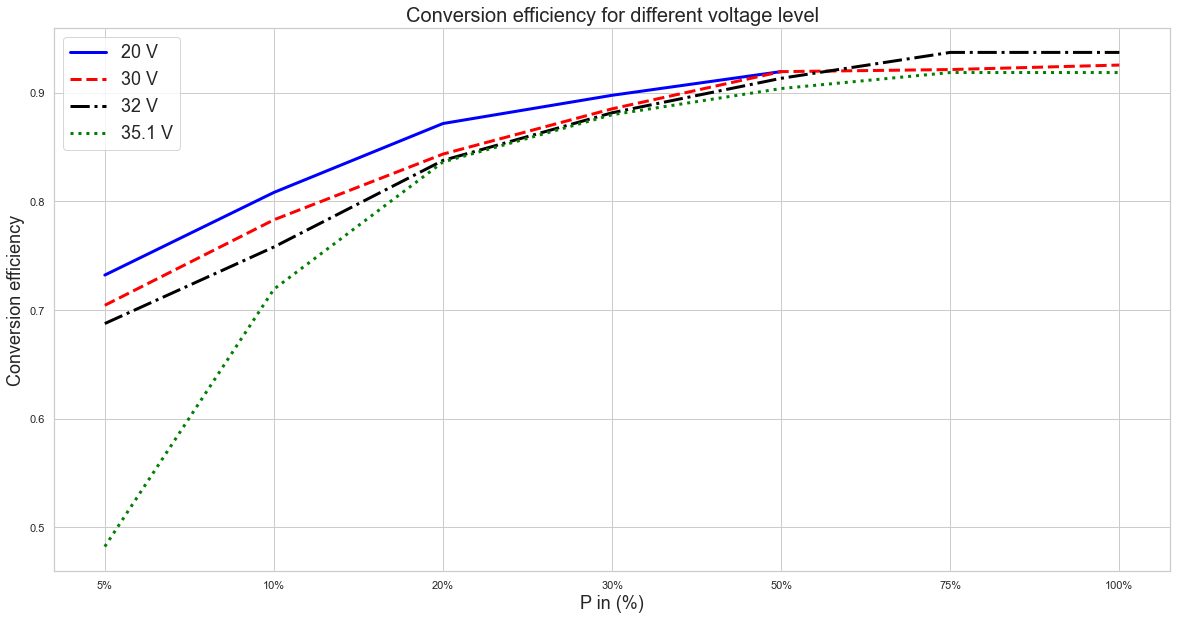

In [62]:
sns.set_style("whitegrid")
x = ['5%','10%','20%','30%','50%','75%','100%']
x1 = ['5%','10%','20%','30%','50%']
df1_30 = pd.DataFrame([0.70437, 0.783106, 0.843629, 0.885292, 0.919555, 0.921468, 0.925606 ])
df2_35 = pd.DataFrame([0.482201, 0.71923, 0.836353, 0.87987, 0.90399, 0.918712, 0.918712 ])
df3_32 = pd.DataFrame([0.687569, 0.758077, 0.837767, 0.881679, 0.913411, 0.937253, 0.937253 ])
df4_20 = pd.DataFrame([Efficiency_5_percent.mean(),Efficiency_10_percent.mean(), Efficiency_20_percent.mean(), Efficiency_30_percent.mean(), Efficiency_50_percent.mean()])
fig, ax = plt.subplots( figsize=(20,10))
plt.title('Conversion efficiency for different voltage level',fontsize=20)
plt.ylabel('Conversion efficiency',fontsize=18)
plt.xlabel ('P in (%)',fontsize=18)

ax.plot(x1,df4_20,label='20 V',linewidth=3.0, color = 'blue' )
ax.plot(x,df1_30,label='30 V',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x,df3_32,label='32 V',linewidth=3.0, linestyle = 'dashdot', color = 'black')
ax.plot(x,df2_35,label='35.1 V',linewidth=3.0,linestyle = ':', color = 'green' )

plt.legend(fontsize=18)

## Plotting MPPT efficiency

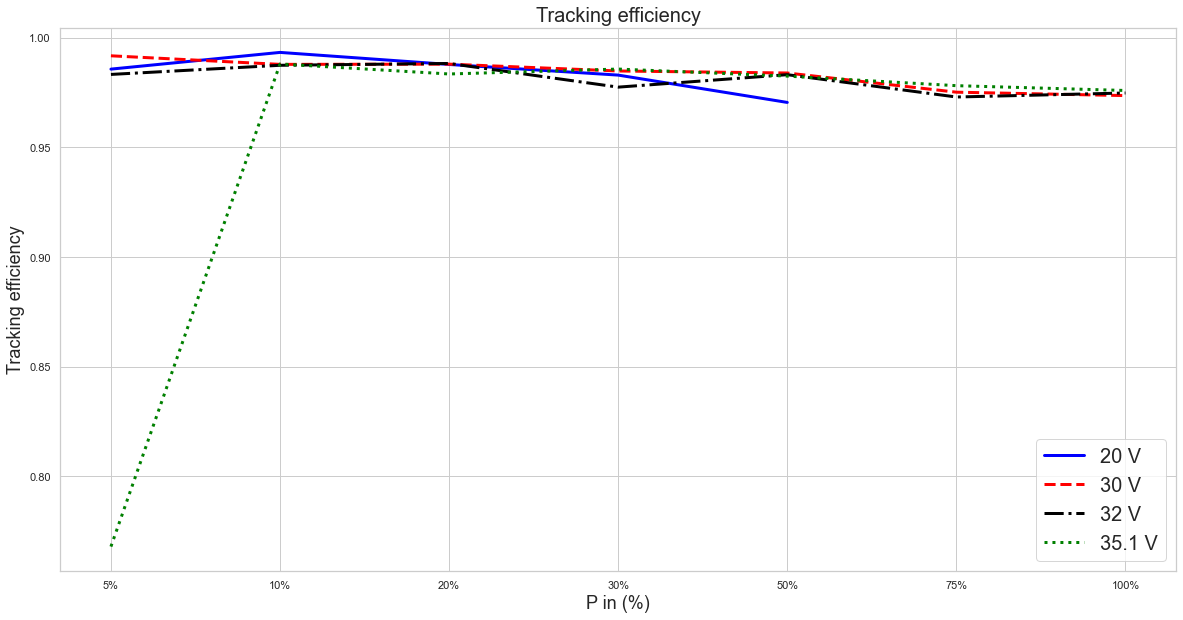

In [63]:
sns.set_style("whitegrid")
x1 = ['5%','10%','20%','30%','50%']
x = ['5%','10%','20%','30%','50%','75%','100%']
MPPT_20V = pd.DataFrame([MPPT_20V_5_percent.mean(), MPPT_20V_10_percent.mean(), MPPT_20V_20_percent.mean(),
                         MPPT_20V_30_percent.mean(), MPPT_20V_50_percent.mean()])

MPPT_30V = pd.DataFrame([MPPT_30V_5_percent.mean(), MPPT_30V_10_percent.mean(), MPPT_30V_20_percent.mean(), 
                         MPPT_30V_30_percent.mean(), MPPT_30V_50_percent.mean(),
                         MPPT_30V_75_percent.mean(), MPPT_30V_100_percent.mean()])

MPPT_32V = pd.DataFrame([MPPT_32V_5_percent.mean(), MPPT_32V_10_percent.mean(), MPPT_32V_20_percent.mean(), 
                         MPPT_32V_30_percent.mean(), MPPT_32V_50_percent.mean(),
                         MPPT_32V_75_percent.mean(), MPPT_32V_100_percent.mean()])

MPPT_35V = pd.DataFrame([MPPT_35V_5_percent.mean(), MPPT_35V_10_percent.mean(), MPPT_35V_20_percent.mean(), 
                         MPPT_35V_30_percent.mean(), MPPT_35V_50_percent.mean(),
                         MPPT_35V_75_percent.mean(), MPPT_35V_100_percent.mean()])

fig, ax = plt.subplots( figsize=(20,10))
plt.title('Tracking efficiency',fontsize=20)
plt.ylabel('Tracking efficiency',fontsize=18)
plt.xlabel ('P in (%)',fontsize=18)

ax.plot(x1,MPPT_20V,label='20 V',linewidth=3.0, color = 'blue' )
ax.plot(x,MPPT_30V,label='30 V',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x,MPPT_32V,label='32 V',linewidth=3.0, linestyle = 'dashdot', color = 'black')
ax.plot(x,MPPT_35V,label='35.1 V',linewidth=3.0,linestyle = ':', color = 'green' )

plt.legend(fontsize=20)



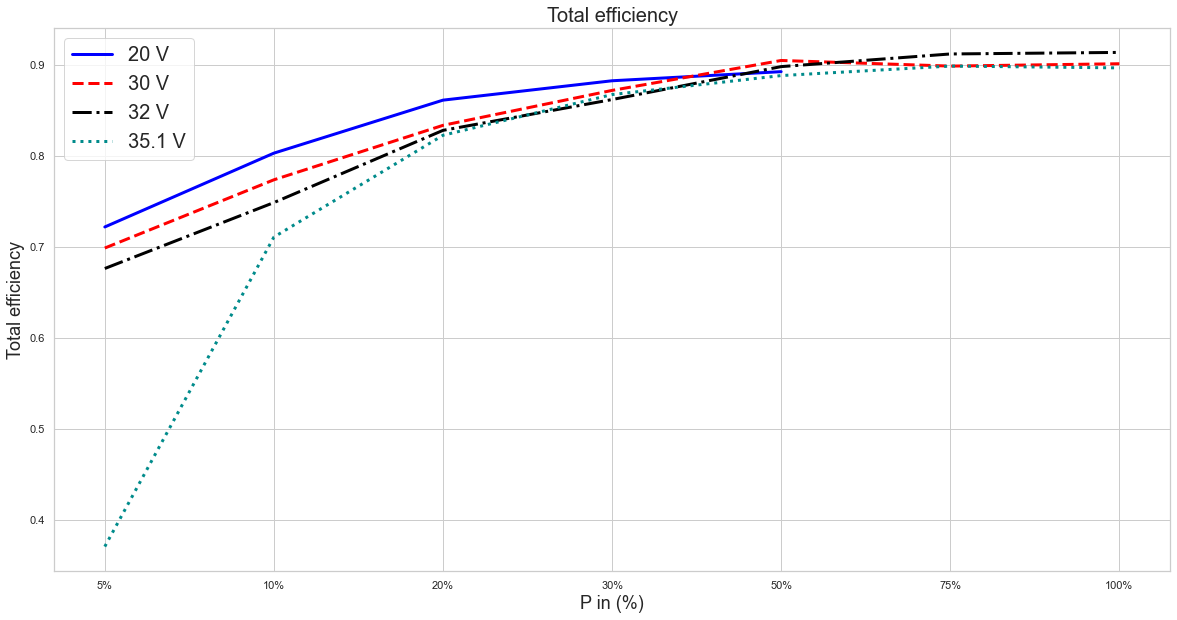

In [64]:
total_eff_20 = df4_20 * MPPT_20V
total_eff_30 = df1_30 * MPPT_30V
total_eff_32 = df3_32 * MPPT_32V
total_eff_35 = df2_35 * MPPT_35V

x1 = ['5%','10%','20%','30%','50%']
x = ['5%','10%','20%','30%','50%','75%','100%']
sns.set_style("whitegrid")

fig, ax = plt.subplots( figsize=(20,10))
plt.title('Total efficiency',fontsize=20)
plt.ylabel('Total efficiency',fontsize=18)
plt.xlabel ('P in (%)',fontsize=18)

ax.plot(x1,total_eff_20,label='20 V',linewidth=3.0, color = 'blue' )
ax.plot(x,total_eff_30,label='30 V',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x,total_eff_32,label='32 V',linewidth=3.0, linestyle = 'dashdot', color = 'black')
ax.plot(x,total_eff_35,label='35.1 V',linewidth=3.0,linestyle = ':', color = 'darkcyan' )

plt.legend(fontsize=20)



In [65]:
fourth_part = pd.read_csv('fourth_part.csv')
fourth_part.head()

,TimeStmp,DC Input Power to Inverter,MPP Power current,Output Power to Grid,Unnamed: 4,TimeStmp.1,DC Input Power,MPP Power slow ramp,Output Power to Grid.1,Unnamed: 9,Unnamed: 10,TimeStmp.2,DC Input Power to Inverter.1,MPP Power voltage,Output Power to Grid.2
0,0.000000,1.3908,2.323602,-0.198630,NaN,0.0,1.4185,0.505131,-0.19274,NaN,NaN,0.000000,6.4758,6.520464,3.3871
1,0.500965,1.3990,2.323602,-0.204520,NaN,0.5,1.4185,0.553608,-0.19247,NaN,NaN,0.499959,6.4748,6.520464,3.3831
2,0.999902,1.4120,2.323602,-0.196280,NaN,1.0,-13.0890,0.603295,-0.19317,NaN,NaN,0.999917,6.4747,6.520464,3.3854
3,1.499870,1.4632,2.323602,0.013626,NaN,1.5,-0.1338,0.654114,-0.19295,NaN,NaN,1.499850,6.4727,6.520464,3.3718
4,2.000864,1.8892,2.323602,0.013650,NaN,2.0,0.0000,0.705869,-0.19330,NaN,NaN,1.999834,6.4706,6.520464,3.3641


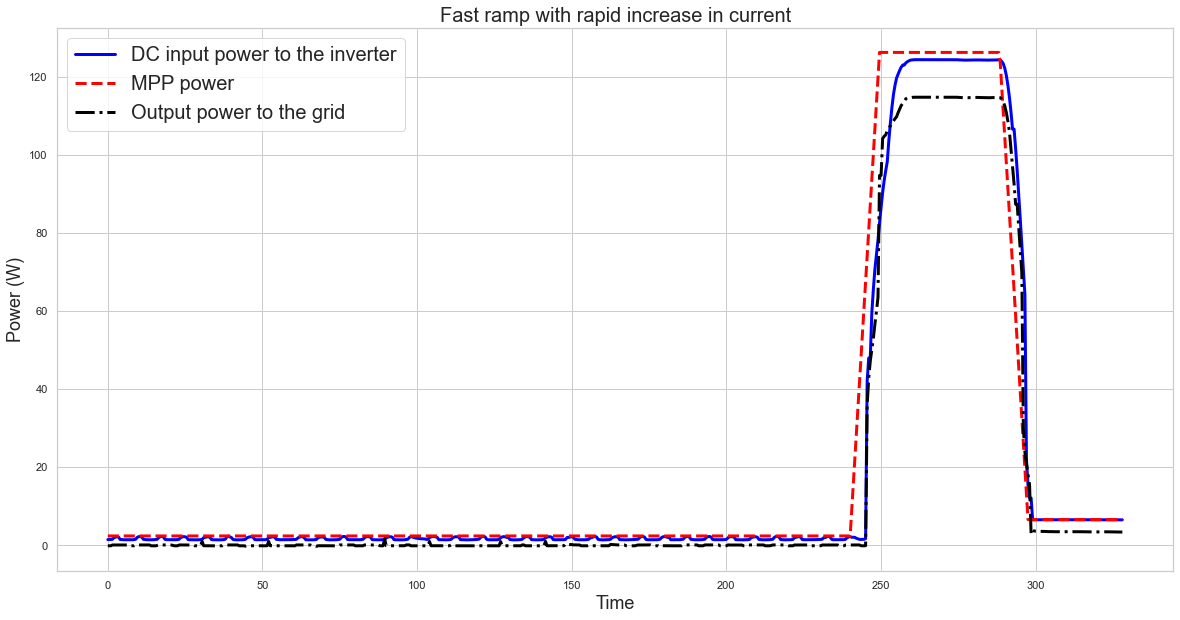

In [66]:
x1 = fourth_part['TimeStmp']
y1 = fourth_part['DC Input Power to Inverter']
y2 = fourth_part['MPP Power current']
y3 = fourth_part['Output Power to Grid']

fig, ax = plt.subplots( figsize=(20,10))
plt.title('Fast ramp with rapid increase in current',fontsize=20)
plt.ylabel('Power (W)',fontsize=18)
plt.xlabel ('Time',fontsize=18)

ax.plot(x1,y1,label='DC input power to the inverter',linewidth=3.0, color = 'blue' )
ax.plot(x1,y2,label='MPP power',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x1,y3,label='Output power to the grid',linewidth=3.0, linestyle = 'dashdot', color = 'black')
plt.legend(fontsize=20)

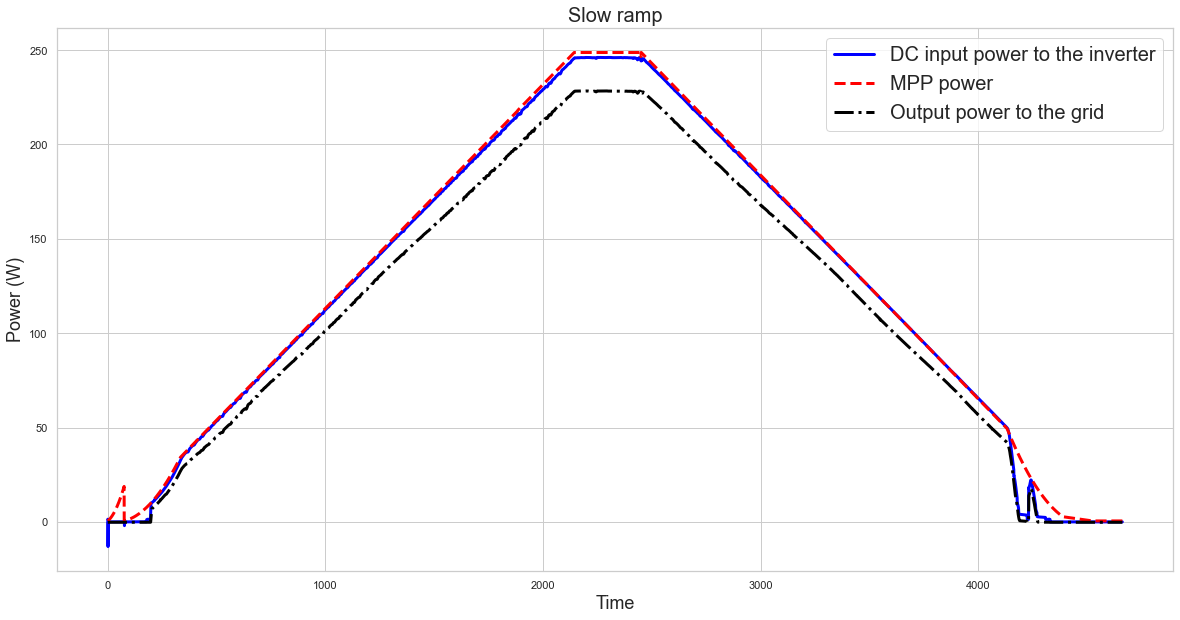

In [67]:
x1 = fourth_part['TimeStmp.1']
y1 = fourth_part['DC Input Power']
y2 = fourth_part['MPP Power slow ramp']
y3 = fourth_part['Output Power to Grid.1']

fig, ax = plt.subplots( figsize=(20,10))
plt.title('Slow ramp',fontsize=20)
plt.ylabel('Power (W)',fontsize=18)
plt.xlabel ('Time',fontsize=18)

ax.plot(x1,y1,label='DC input power to the inverter',linewidth=3.0, color = 'blue' )
ax.plot(x1,y2,label='MPP power',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x1,y3,label='Output power to the grid',linewidth=3.0, linestyle = 'dashdot', color = 'black')
plt.legend(fontsize=20)

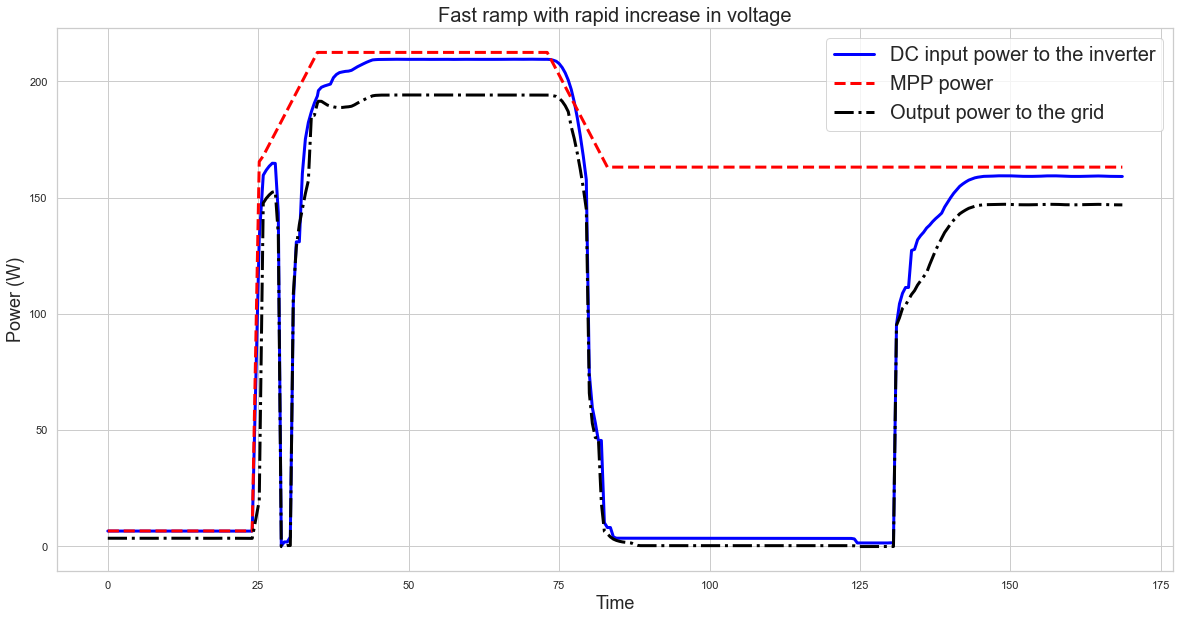

In [68]:
x1 = fourth_part['TimeStmp.2']
y1 = fourth_part['DC Input Power to Inverter.1']
y2 = fourth_part['MPP Power voltage']
y3 = fourth_part['Output Power to Grid.2']

fig, ax = plt.subplots( figsize=(20,10))
plt.title('Fast ramp with rapid increase in voltage',fontsize=20)
plt.ylabel('Power (W)',fontsize=18)
plt.xlabel ('Time',fontsize=18)

ax.plot(x1,y1,label='DC input power to the inverter',linewidth=3.0, color = 'blue' )
ax.plot(x1,y2,label='MPP power',linewidth=3.0, linestyle = 'dashed', color = 'red')
ax.plot(x1,y3,label='Output power to the grid',linewidth=3.0, linestyle = 'dashdot', color = 'black')
plt.legend(fontsize=20)